In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib
import matplotlib.pyplot as plt             #visualisation
import os
from sklearn import preprocessing 

%matplotlib inline     
sns.set(color_codes=True)

In [2]:
carsons_path = 'C:\\Users\\Carson\\Desktop\\cmpe351'

listings = pd.read_csv(os.path.join(carsons_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(carsons_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(carsons_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(carsons_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(carsons_path, "reviews.csv"))


minimum_nights              minimum number of night stay for the listing (calendar rules may be different)
minimum_minimum_nights      the smallest minimum_night value from the calender (looking 365 nights in the future)
maximum_minimum_nights      the largest minimum_night value from the calender (looking 365 nights in the future)
minimum_nights_avg_ntm      the average minimum_night value from the calender (looking 365 nights in the future)

### RQ2: How does the minimum number of nights that customers must book affect the likelihood of a property being vacant?

In [3]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.52367,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.53430,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.36646,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.48793,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.53680,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN


In [5]:
sum_nbhd.head()

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley
3,NaN,Brent
4,NaN,Bromley


In [6]:
sum_rev.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [7]:
revs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [8]:
listings['minimum_minimum_nights']

0         2.0
1         2.0
2         4.0
3        14.0
4         1.0
         ... 
91773     7.0
91774     3.0
91775     1.0
91776     1.0
91777     1.0
Name: minimum_minimum_nights, Length: 91778, dtype: float64

In [9]:
listings['minimum_nights']

0         2
1         2
2         4
3        14
4         1
         ..
91773     7
91774     3
91775     1
91776     1
91777     3
Name: minimum_nights, Length: 91778, dtype: int64

In [10]:
(listings['minimum_minimum_nights']-listings['minimum_nights']).describe()

count    91777.000000
mean        -0.361627
std          9.631561
min       -997.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        364.000000
dtype: float64

In [11]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<Axes: title={'center': 'minimum_nights'}>]], dtype=object)

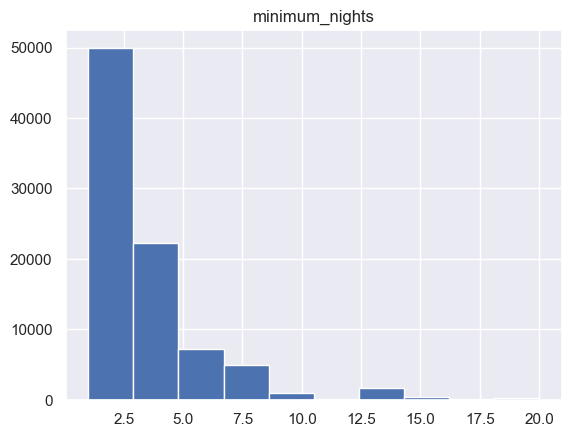

In [40]:
pd.DataFrame.hist(data = sum_listings[sum_listings['minimum_nights']<21], column='minimum_nights', bins=10)

In [26]:
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [41]:
dud_listings =listings[listings['minimum_nights']<21]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

-0.01777665863703026
-0.027009241761443786
-0.027039518758866562
-0.017033694676708167


In [43]:
dud_listings =listings[listings['minimum_nights']>100]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.07267615512962514
0.09882105041409299
0.10216398682478167
0.13653208010799847


does not appear to be a substantial correlation between number of minimum nights and availability
